In [1]:
#@title # **Importando Bibliotecas**
# !pip install control
import pandas as pd
import numpy as np
# from IPython.display import display, Math, Latex, Markdown
# import plotly.express as px
import matplotlib.pyplot as plt
# import control as ct
from scipy.signal import square

### **RELATÓRIO DE LABORATÓRIO DE CONTROLE**

#### **Docente: Dr. Cleison Daniel Silva**

#### **Discentes: Denilson Costa (201933940003), Lucas Holanda (201933940037) e Yuri Cota (201933940045)**

#### **Assunto: Resposta de Sistemas de Primeira Ordem**

#### **Data de Entrega: 10/04/2023**

---

### **1. Introdução** 

<p ALIGN=justify>Este relatório de laboratório tem como objetivo analisar as respostas de um sistema de primeira ordem utilizando uma bancada didática motor-gerador. O experimento consistiu em medir a resposta do sistema a vários tipos de entradas e a partir desses dados, foi possível determinar os parâmetros do sistema, como a constante de tempo, o ganho, a resposta transitória e a resposta estacionária. O experimento é importante para compreender como os sistemas de primeira ordem respondem a diferentes entradas e como é possível modelá-los matematicamente para posteriormente aplicar técnicas de controle. O relatório apresenta os ensaios realizados, a análise dos dados, os resultados obtidos e as conclusões sobre o experimento.</p>

### **2. Investigação experimental do comportamento dinâmico da bancada motor-gerador em diferentes pontos de operação**

<p ALIGN=justify>Os ensaios para identificação de modelos são importantes para a compreensão e modelagem de sistemas, pois permitem obter informações sobre o comportamento do sistema em diferentes condições de operação. A utilização de pontos de operação específicos é importante para garantir que o modelo identificado seja válido para aquela faixa de operação. Além disso, a identificação de modelos a partir de ensaios permite entender a dinâmica do sistema, fornecendo informações valiosas para projetar e otimizar sistemas de controle. Com base nos modelos identificados, é possível projetar controladores que ajustem o comportamento do sistema de acordo com as necessidades específicas, proporcionando melhorias no desempenho, segurança e eficiência do sistema.</p>

<p ALIGN=justify>A bancada utilizada para realização dos experimentos foi a número 1, que possui uma tensão de fornecimento de 15 V. O sistema didático utilizado é composto por dois motores acoplados através de seus eixos. O primeiro motor funciona como um motor convencional e o segundo como um gerador. Ambos são controlados por um arduino e uma ponte H L298N, que são alimentados por uma fonte de corrente contínua. A Figura 1 exibe uma representação visual do sistema, com os motores acoplados e os componentes de controle e alimentação.</p>

<p ALIGN=justify>Em um primeiro momento, foram escolhidos os pontos de operação de 20% (3 V), 50% (7,5 V) e 80% (12 V) da tensão da bancada. Esses pontos foram mantidos durante um período de 2 segundos, com amplitude igual a zero. No primeiro caso, conforme o gráfico plotado na Figura 2, foi possível observar que o motor permaneceu parado devido ao fato de não ter atingido a tensão mínima de operação. Como resultado, o motor não teve torque suficiente para vencer a inércia e iniciar o movimento.</p>

<p ALIGN=justify>Nos pontos de operação de 50% e 80%, o motor teve um bom desempenho e iniciou o movimento rapidamente, atingindo uma velocidade constante após alguns instantes. Os gráficos correspondentes a esses pontos de operação são apresentados nas Figuras 3 e 4, respectivamente.</p> 

<p ALIGN=justify>Como pode ser observado nas figuras, o comportamento do motor é compatível com um sistema de primeira ordem. Esses resultados podem ser utilizados para a identificação de um modelo matemático para o sistema.</p>

# Dados

In [12]:
#@title # **Carregamento dos dados**

csv_urls = ['https://raw.githubusercontent.com/cotabr/Projetos/main/Faculdade/4.%20Laborat%C3%B3rio%20de%20Controle/Ensaio%20(27-03-2023)/2.%20Dados/05-04-23/Opera%C3%A7%C3%A3o%20para%2020%25.csv',
            'https://raw.githubusercontent.com/cotabr/Projetos/main/Faculdade/4.%20Laborat%C3%B3rio%20de%20Controle/Ensaio%20(27-03-2023)/2.%20Dados/05-04-23/Opera%C3%A7%C3%A3o%20para%2050%25.csv',
            'https://raw.githubusercontent.com/cotabr/Projetos/main/Faculdade/4.%20Laborat%C3%B3rio%20de%20Controle/Ensaio%20(27-03-2023)/2.%20Dados/05-04-23/Opera%C3%A7%C3%A3o%20para%2080%25.csv',
            'https://raw.githubusercontent.com/cotabr/Projetos/main/Faculdade/4.%20Laborat%C3%B3rio%20de%20Controle/Ensaio%20(27-03-2023)/2.%20Dados/05-04-23/Ponto%20de%20Opera%C3%A7%C3%A3o%2030%20com%20degrau%20de%20-1V.csv',
            'https://raw.githubusercontent.com/cotabr/Projetos/main/Faculdade/4.%20Laborat%C3%B3rio%20de%20Controle/Ensaio%20(27-03-2023)/2.%20Dados/05-04-23/Ponto%20de%20Opera%C3%A7%C3%A3o%2030%20com%20degrau%20de%200%2C9V.csv',
            ]

dfs = []

for url in csv_urls:

    df = pd.read_csv(url, sep = ';', names = ['tempo', 'r', 'y'])

    dfs.append(df)

dfs[4]


,tempo,r,y
0,0.00,5.4,0.00
1,0.02,5.4,0.00
2,0.04,5.4,0.00
3,0.06,5.4,0.33
4,0.08,5.4,0.83
...,...,...,...
495,9.90,3.6,1.00
496,9.92,3.6,1.03
497,9.94,3.6,1.08
498,9.96,3.6,1.05


In [ ]:
df_1 = pd.read_csv(url_1, sep = ';', names = ['tempo', 'r', 'y'])

#50%
url_2 = 'https://raw.githubusercontent.com/cotabr/Projetos/main/Faculdade/4.%20Laborat%C3%B3rio%20de%20Controle/Ensaio%20(27-03-2023)/2.%20Dados/Cinquenta%20Porcento.csv'
df_2 = pd.read_csv(url_2, sep = ';', names = ['tempo', 'r', 'y'])

#80%
url_3 = 'https://raw.githubusercontent.com/cotabr/Projetos/main/Faculdade/4.%20Laborat%C3%B3rio%20de%20Controle/Ensaio%20(27-03-2023)/2.%20Dados/Oitenta%20Porcento.csv'
df_3 = pd.read_csv(url_3, sep = ';', names = ['tempo', 'r', 'y'])

#Ensaio com ponto de operação
url_4 = 'https://raw.githubusercontent.com/cotabr/Projetos/main/Faculdade/4.%20Laborat%C3%B3rio%20de%20Controle/Ensaio%20(27-03-2023)/2.%20Dados/Ponto%20de%20Opera%C3%A7%C3%A3o%2050%20com%20degrau%20de%201V%20freq%200%2C5.csv'
df_4 = pd.read_csv(url_4, sep = ';', names = ['tempo', 'r', 'y'])


# ATIVIDADE

---

**Os valores deveriam ser iguais? Explique.**

Na teoria os ganhos deveriam ser o mesmo, no entanto, como estamos tratando de um sistema real existem uma série de intempéries que afetam diretamente o valor resultante, dentre elas temos as perdas mecânicas e elétricas.

---

## **Roteiro 1 - Resposta de Sistemas de Primeira Ordem**

---

### **1. Mostre que para uma entrada degrau de amplitude A a resposta do sistema (1) é dada pela equação (2).**

Seja a entrada degrau $u(t)$ de amplitude A:

\begin{equation}
U(s)= \dfrac{A}{s}
\end{equation}

Logo,

\begin{equation}
Y(s)=G(s)U(s)=\dfrac{K}{\tau s +1}\cdot \dfrac{A}{s}=\dfrac{AK}{s}-\dfrac{AK}{s+1/\tau}
\end{equation}

Aplicando a transformada de Laplace inversa:

\begin{equation}
y(t)=AK\left(1-e^{\dfrac{t}{\tau}}\right), \; \forall \geq 0
\end{equation}

---

### **2. Assuma que $y(\infty)=3$ para um degrau de $0,5$ de amplitude. Determine o valor do ganho do sistema ($K=?$)**

O valor da saída em regime permanente é:

\begin{equation}
y(∞)=KA
\end{equation}

Logo,

\begin{equation}
KA=3 → Substituindo \; A, \; temos: \; K=\dfrac{3}{0,5}=6
\end{equation}

---

### **3. Para $K=1,63$ e $A=2$. Determine a constante de tempo do sistema.**

O instante de tempo $t(63\%)$ para que se atinja $63\%$ de $y(∞)$ é dado por:

\begin{equation}
0,6321KA=KA(1-e^{-\dfrac{t}{\tau}})=\tau
\end{equation}

Logo,

\begin{equation}
\tau = 0,6321\times 1,63 \times 2 = 2,060646\; s
\end{equation}

---

### **4. Explique porquê para valores de $\tau<0$ o sistema é instável.**

Se o valor de $\tau$ é negativo, isso resulta em um polo no semiplano direito do plano complexo, que produz uma resposta natural crescente, sem limites, à medida que o tempo tende para infinito, caracterizando um sistema instável.

[Referências](http://www.ene.unb.br/estognetti/files/20172/Aula-07_CP.pdf)

# **Identificação da bancada baseado em um modelo de primeira ordem**

Os dados de entrada e saida para um ensaio de uma quadrada com um valor DC de 7.5 e amplitude de 1, podem ser mostradas na fiura abaixo, onde temos que em preto esta os dados de entrada variando no tempo e quanto que em vermelho tem-se os dados que correspodem a resposta do sistema.

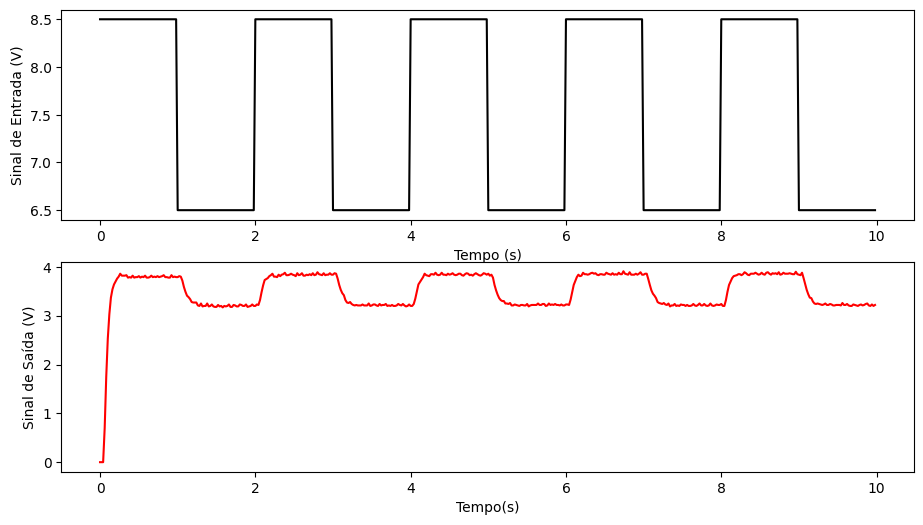

In [10]:
plt.figure(figsize = (11,6))
plt.subplot(2,1,1)
plt.plot(df_4['tempo'], df_4['r'],'k')
plt.xlabel('Tempo (s)')
plt.ylabel('Sinal de Entrada (V)')
plt.subplot(2,1,2)
plt.plot(df_4['tempo'], df_4['y'],'r')
plt.xlabel('Tempo(s)')
plt.ylabel('Sinal de Saída (V)')
plt.show()

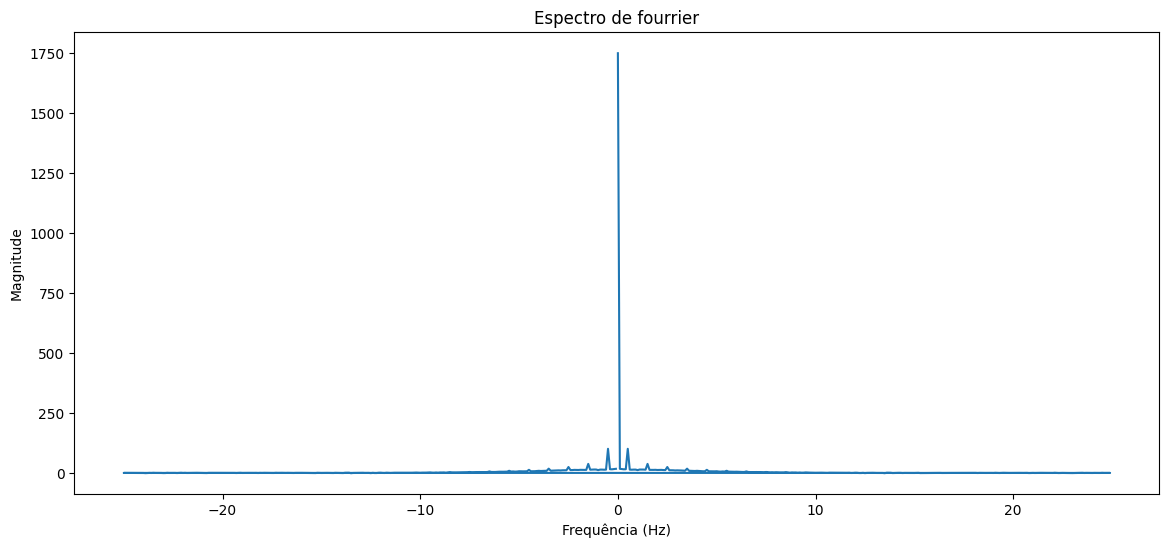

In [11]:
import numpy as np
import matplotlib.pyplot as plt

t = df_4['tempo'] # tempo
f = 0.5 # frequência em Hz
x = df_4['y'] # sinal

fft = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), t[1] - t[0])

plt.figure(figsize =(14,6))
plt.plot(freqs, np.abs(fft))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro de fourrier')
plt.show()


Após a definição do conjunto de dados de entrada e saída do sistema, deve-se realizar uma preparação dos dados, nas quais consistiram em descartar as amostras que correspodem ao regime transitório do sistema, ou seja, quando o sistema sai da zona morta, valor esse que pode ser econtrado a partir da amostra numero 13.

In [12]:
t = df_4['tempo']
r = df_4['r']
y =df_4['y']

a = 13
t = t[a:]
r = r[a:]
y = y[a:]



Por seguinte deve-se retirar o valor DC tanto do sinal de entrada quanto do sinal de saída.

In [13]:

r = r-7.5
y = y - np.mean(y)

figk18 = px.line( x=t,y = r, height = 400, width = 1000)
figk18.show()

figk18 = px.line( x=t,y = y, height = 400, width = 1000)
figk18.show()


## **Constante de Tempo**

A constante de tempo $𝜏$  foi definida a partir dos periodos transitórios da faixa de amplitude, levando em consideração 3 amostras com transitório ascendente, ou seja, o valor do sinal partindo do minimo para o máximo e 3 descedente, que seriam os momemntos em que o sinal vai partir do valor máximo para minimo. os 3 primeiros valores da constante correspodem aos valores ascendentes e os 3 a valores descedentes.


| Constante de tempo | tempo (s) 
| -------- -----------| -------- |
| $τ_{1}$ | 0.0973 | 
|$τ_{2}$   | 0.0738 | 
|$τ_{3}$   | 0.0997 | 
|$τ_{4}$  |0.084 | 
|$τ_{5}$   | 0.0861| 
|$τ_{6}$  | 0.0842 |
| $\tau_{medio}$ | 0.087516|



In [14]:
tau = np.array([0.0973,0.0738,0.0997,0.084,0.0861,0.0842])
tau = np.average(tau)
print(tau)

0.08751666666666667


### **Ganho do Motor**

Para determinarmos o ganho do motor devemos ter como base os dados de ensaio so sistema para um ponto de operação previamente determinado, visto que trata-se de um sistema não linear.

O ganho *$k$* sera determinado através de técnicas estatiscas, onde teremos um conjunto com 400 amostras, onde poderemos excucionar a quantidade de periodos necessarios para tal identificação.

O valor do ganho por amostra *$k_n$* pode ser obtido através da seguinte relação.

$$k_n = \frac{Δy}{Δr}$$.

Sendo:

Δy: variação do sinal de saída;

Δr: variação do sinal de entrada.

Esse valor sera obtido para cada periodo de amostragem do sinal, com o descarte da primeira amostra que resulta em um ponto onde temos  a zona morta, pois o motor ainda esta saindo da inercia incial.

Após realizar a medição de todos os ganhos amostrais, deve-se tirar um média aritimética dos seus valores da seguinte maneira.

$$k = \frac{∑_{0}^{n}k_n}{n}$$

onde temos que **$k$** representara o valor do ganho do motor.




|Ganho do motor |  |
| -------- -----------| -------- |
| $k_{1}$ | 0.62 | 
|$k_{2}$   | 0.63 | 
|$k_{3}$   | 0.62| 
|$k_{4}$  |0.62 | 
|$k_{5}$   | 0.61| 
|$k_{6}$  | 0.63 |
| $k_{medio}$ | 0.087516|







In [15]:

amplitude_saida =np.array([0.62, 0.63, 0.62, 0.62, 0.61, 0.63])
amplitude_entrada = 2
K = np.mean(amplitude_saida)/amplitude_entrada
print("Ganho do motor = ",K)

Ganho do motor =  0.31083333333333335


## **Comparação entre o modelo e o sistema real**

No código abaixo esta sendo realizado a criação de uma onda quadrada com valores que emulam o sinal aplicado inicialmente a bancada motor-gerador, o intuito é estabelecer a relação entre o modelo encontrado e o sinal real coletado na bancada. para isso pode-se montar a função de transferência a partir dos dados obtidos no ensaio para o ponto de operação, onde tem-se os valores dos ganhos e constantes de tempo de um sistema de primeira ordem.

In [16]:
N = 500     # Quantidade de amostras
Fs = 50     # Frequência de amostragem
Ts = 1/Fs   # Período de amostragem

Amplitude = 1
freq = 0.5
nivel_dc = 7.5

n = np.arange(0,N)
# onda_dente_serra = A*sawtooth(2*np.pi*(f/Fs)*n) + nivel_dc
onda_quadrada = Amplitude*square(2*np.pi*freq*n*Ts) + nivel_dc

for ind in n:
  if (ind < 100):
    onda_quadrada[ind] = nivel_dc - Amplitude


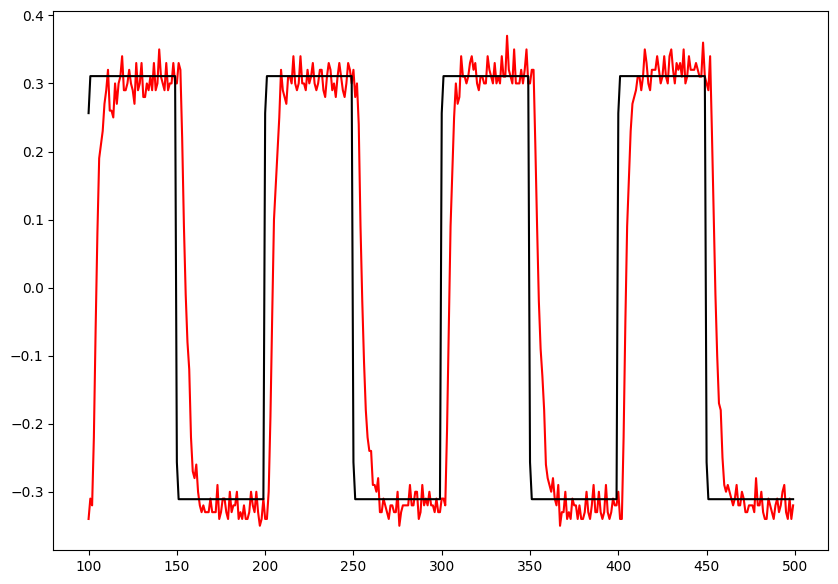

Gs =  
   0.3108
-------------
0.08752 s + 1



In [19]:
Km = K   # Valor do Ganho Obtido
 # Valor da Constante de tempo
NUM = [Km]
DEN = [np.average(tau), 1]

tempo = n
sinal_de_entrada = onda_quadrada

Gs = ct.tf(NUM,DEN) # Função de transferência
tempo , saida_modelo = ct.forced_response(Gs, T = tempo, U = sinal_de_entrada)

amost = 100

tempo_validacao = tempo[amost:]
saida_modelo = saida_modelo[amost:]
y_real = df_4['y']
y_real = y_real[amost:]

saida_modelo  = saida_modelo - np.mean(saida_modelo)
y_real = y_real-np.mean(y_real) 

plt.figure(figsize=(10,7)) 
plt.plot(tempo_validacao, y_real, 'r', tempo_validacao, saida_modelo, 'k') 
plt.show()


In [24]:
print("Função de Transfência do Sistema")
print(Gs) #Função de transferência

Função de Transfência do Sistema

   0.3108
-------------
0.08752 s + 1



## **Erro**



Uma métrica muito importante para verificação do comportamento do modelo, é o NRMS, uma métrica que relaciona o erro médio quadrático entre dois sinais, onde tem-se como comparação para essa aplicação os sinais de saída da planta e o sinal de saida do modelo, sendo que em ambos tem-se a necessidade da aplicação do mesmo sinal:

$$r = A \times cos(ω t)$$

Sendo a amplitude A igual a 1 volts, frequência f igual a 0.5Hz

Onde tem-se que o erro pode ser calculado através da seguinte equação.
$$E_{rms} = \frac{∑(y_m-y_r)^2}{n}$$

In [18]:
erro_rms = (np.sum((saida_modelo - y_real)**2)/np.size(y_real))
print("Erro RMS:", np.sqrt(erro_rms))


Erro RMS: 0.1837792218372541
